In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
#한글 깨짐 방지
from matplotlib import rc, font_manager
font_path='../data/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
#마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [3]:
# 데이터 불러오기
data = pd.read_csv('../data/merge/mackerel_price_trade.csv')
# '%Y-%m' 형식으로 변환
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.set_index('date',inplace=True)
data

,생산량,갈치,참조기,수입,수출,가격 (원)
date,,,,,,
2014-01-01,5663,2805,3,3476,4840,3422
2014-02-01,3565,1436,1,1101,3402,4073
2014-03-01,2620,2740,1,2011,2033,3891
2014-04-01,1525,2894,6,2454,2122,4259
2014-05-01,412,908,3,1995,755,3512
...,...,...,...,...,...,...
2022-08-01,3900,682,28,2056,613,3543
2022-09-01,5494,1809,10,2194,1996,3333
2022-10-01,5339,987,239,679,6242,3175


In [4]:
# 시계열 데이터 선택
ts_data = data['수입']

# ARIMA 모델 학습
model = sm.tsa.ARIMA(ts_data, order=(24, 1, 0))  # ARIMA(p, d, q)의 각 매개변수 설정
results = model.fit()

c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\workspace\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Like

In [5]:
# 미래 값 예측
forecast_steps = 27  # 2024년 1월부터 12월까지의 예측
forecast = results.forecast(steps=forecast_steps)
df=pd.DataFrame(forecast)
df.loc[df['predicted_mean']<0]=0
df

,predicted_mean
2023-01-01,8464.350476
2023-02-01,10132.330564
2023-03-01,9517.662648
2023-04-01,4855.500468
2023-05-01,4490.644249
2023-06-01,1476.341555
2023-07-01,3147.062176
2023-08-01,2115.651703
2023-09-01,3030.800258
2023-10-01,717.028481


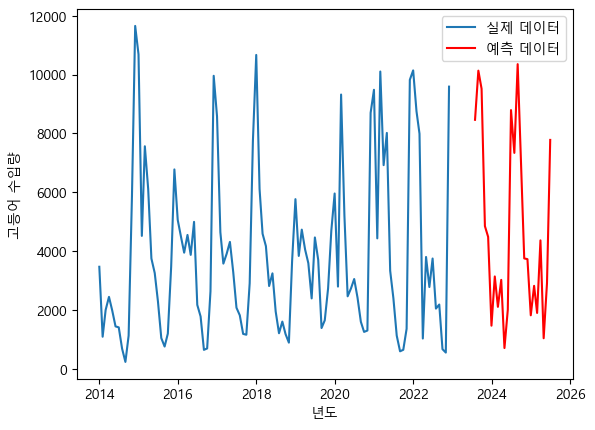

In [6]:
# 예측 결과 시각화
plt.plot(ts_data.index, ts_data, label='실제 데이터')
forecast_index = pd.date_range(start='2023-07-01', periods=forecast_steps, freq='M')
plt.plot(forecast_index, df['predicted_mean'], label='예측 데이터', color='red')
plt.legend()
plt.xlabel('년도')
plt.ylabel('고등어 수입량')
plt.show()

In [7]:
# 2024년 예측값 출력
print("2023~24년 예상 수온(30m) :", forecast)
df.rename(columns={'predicted_mean':'수입'}).to_csv('../data/pred/predict_수입.csv',encoding='utf-8-sig')

2023~24년 예상 수온(30m) : 2023-01-01     8464.350476
2023-02-01    10132.330564
2023-03-01     9517.662648
2023-04-01     4855.500468
2023-05-01     4490.644249
2023-06-01     1476.341555
2023-07-01     3147.062176
2023-08-01     2115.651703
2023-09-01     3030.800258
2023-10-01      717.028481
2023-11-01     2014.449015
2023-12-01     8793.936609
2024-01-01     7340.893197
2024-02-01    10353.117920
2024-03-01     7125.182607
2024-04-01     3759.505482
2024-05-01     3734.359067
2024-06-01     1828.484694
2024-07-01     2828.386894
2024-08-01     1908.514481
2024-09-01     4371.921894
2024-10-01     1049.595605
2024-11-01     2921.952173
2024-12-01     7781.703096
Freq: MS, Name: predicted_mean, dtype: float64
